In [24]:
#imports
from google.colab import drive
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score, classification_report, confusion_matrix, roc_curve
from scipy import stats

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# No hace falta drive.mount porque ya estaba puesto en el drive.
# Primer df House Prices
mainpath = "/content/drive/MyDrive/Colab Notebooks/datasets-main/House Prices - Advanced Regression Techniques/"
filename = "House-Prices-Advanced.csv"
fullpath = os.path.join(mainpath, filename)
df1 = pd.read_csv(fullpath)

In [27]:
#Segundo df Sale Prices, al estar en la misma ruta no se necestia otro mainpath
filename = "SalePrices.csv"
fullpath = os.path.join(mainpath, filename)
df2 = pd.read_csv(fullpath)

#En el csv SalePrice se repite la columna ID, por lo cual hay que realizar un drop antes de hacer la copia
df2.drop(columns=['Id'], inplace=True)
df2.head()

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977


In [28]:
#Copy
df_copia = pd.concat([df1, df2], axis=1)
df_copia.reset_index(drop=True, inplace=True)
df = df_copia.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [30]:
df = df[['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'OpenPorchSF',
         'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
         'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
         'Street', 'SalePrice']]

df.head()

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Street,SalePrice
0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730.0,Pave,169277.052498
1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312.0,Pave,187758.393989
2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482.0,Pave,183583.683570
3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470.0,Pave,179317.477511
4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506.0,Pave,150730.079977


In [31]:
#NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1459 non-null   int64  
 1   1stFlrSF      1459 non-null   int64  
 2   2ndFlrSF      1459 non-null   int64  
 3   GrLivArea     1459 non-null   int64  
 4   OpenPorchSF   1459 non-null   int64  
 5   FullBath      1459 non-null   int64  
 6   HalfBath      1459 non-null   int64  
 7   BedroomAbvGr  1459 non-null   int64  
 8   KitchenAbvGr  1459 non-null   int64  
 9   TotRmsAbvGrd  1459 non-null   int64  
 10  YearBuilt     1459 non-null   int64  
 11  YearRemodAdd  1459 non-null   int64  
 12  GarageArea    1458 non-null   float64
 13  Street        1459 non-null   object 
 14  SalePrice     1459 non-null   float64
dtypes: float64(2), int64(12), object(1)
memory usage: 171.1+ KB


In [32]:
# Parece que todo los datos estan completos a excepcion de GarageArea
print(df['GarageArea'].isnull().sum())

1


In [33]:
# Al ser solo un valor nulo se opta por eliminar la fila
df = df.dropna(subset=['GarageArea'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1458 non-null   int64  
 1   1stFlrSF      1458 non-null   int64  
 2   2ndFlrSF      1458 non-null   int64  
 3   GrLivArea     1458 non-null   int64  
 4   OpenPorchSF   1458 non-null   int64  
 5   FullBath      1458 non-null   int64  
 6   HalfBath      1458 non-null   int64  
 7   BedroomAbvGr  1458 non-null   int64  
 8   KitchenAbvGr  1458 non-null   int64  
 9   TotRmsAbvGrd  1458 non-null   int64  
 10  YearBuilt     1458 non-null   int64  
 11  YearRemodAdd  1458 non-null   int64  
 12  GarageArea    1458 non-null   float64
 13  Street        1458 non-null   object 
 14  SalePrice     1458 non-null   float64
dtypes: float64(2), int64(12), object(1)
memory usage: 182.2+ KB


In [34]:
df.describe()

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,SalePrice
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,9819.681756,1156.681756,325.583676,1485.811385,48.347051,1.570645,0.377915,2.853909,1.042524,6.385460,1971.390947,1983.652263,472.768861,179185.492143
std,4957.177700,398.262751,420.498485,485.650025,68.895365,0.555267,0.503092,0.830064,0.208540,1.509379,30.374071,21.133895,217.048611,16523.861242
min,1470.000000,407.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1879.000000,1950.000000,0.000000,135751.318893
25%,7390.500000,873.250000,0.000000,1117.250000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,1953.000000,1963.000000,318.000000,168696.541746
50%,9413.500000,1079.500000,0.000000,1431.000000,28.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1973.000000,1992.000000,480.000000,179221.296036
75%,11518.750000,1382.750000,675.500000,1721.000000,72.000000,2.000000,1.000000,3.000000,1.000000,7.000000,2001.000000,2004.000000,576.000000,186804.010062
max,56600.000000,5095.000000,1862.000000,5095.000000,742.000000,4.000000,2.000000,6.000000,2.000000,15.000000,2010.000000,2010.000000,1488.000000,281643.976117


In [35]:
# Lista de columnas para verificar outliers
cols_to_check = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice']

# Crea un nuevo dataframe para almacenar los datos sin outliers
df_no_outliers_z = df.copy()

for column in cols_to_check:
    # Calcula el Z-score para cada punto en la columna
    z_scores = stats.zscore(df[column])

    # Define un umbral para los outliers. En este caso, estamos usando un umbral de 3,
    # lo que significa que cualquier punto con un Z-score mayor a 3 o menor a -3 será considerado un outlier.
    threshold = 3


In [36]:
    # Elimina los outliers
    df_no_outliers_z = df_no_outliers_z[(z_scores > -threshold) & (z_scores < threshold)]

In [37]:
# Imprime la cantidad de datos restantes después de eliminar outliers
print(f'Cantidad de datos antes de eliminar outliers: {len(df)}')
print(f'Cantidad de datos después de eliminar outliers: {len(df_no_outliers_z)}')

Cantidad de datos antes de eliminar outliers: 1458
Cantidad de datos después de eliminar outliers: 1446


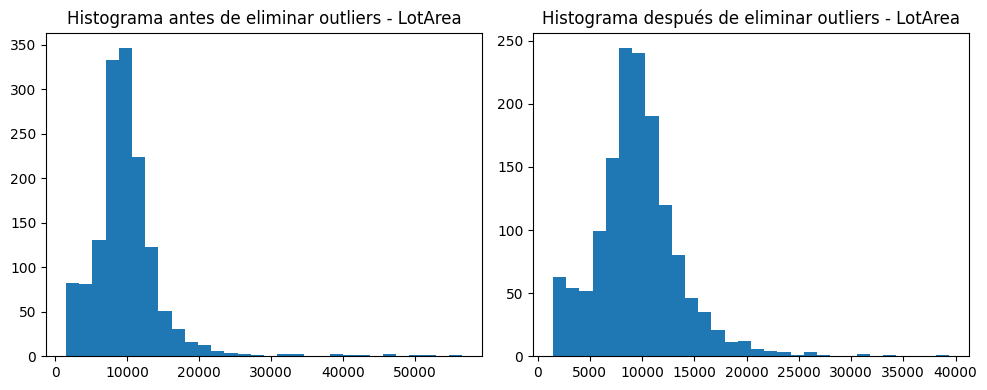

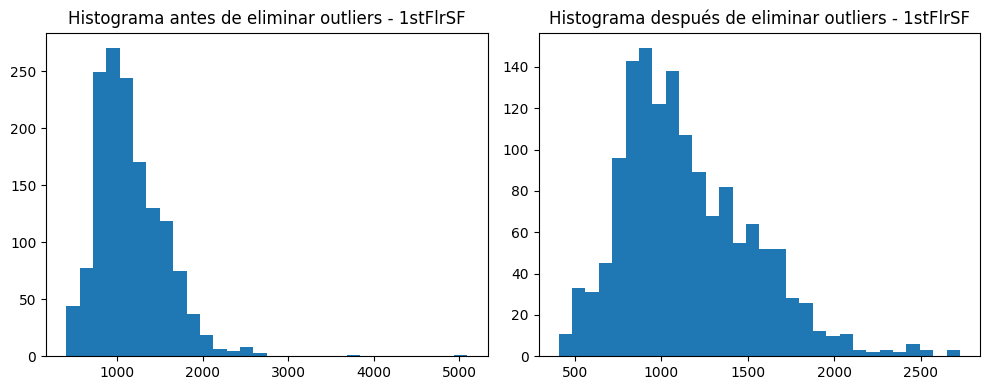

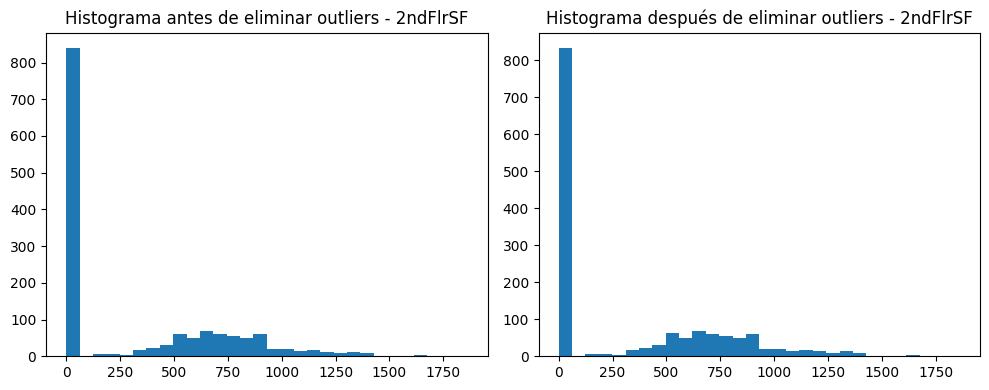

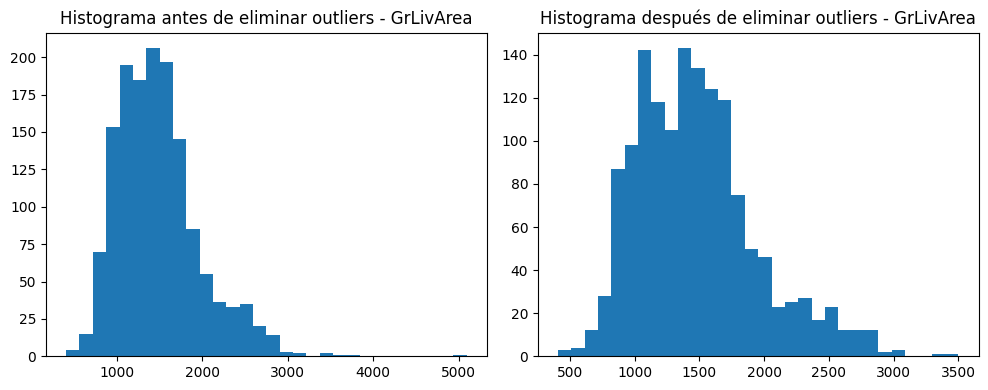

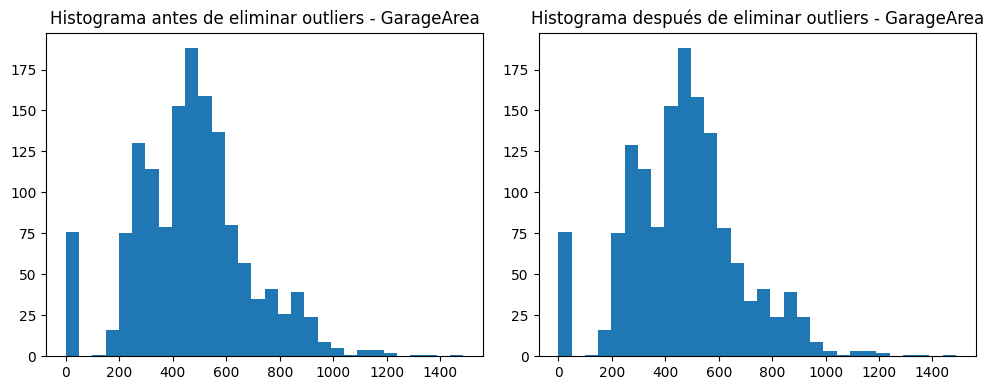

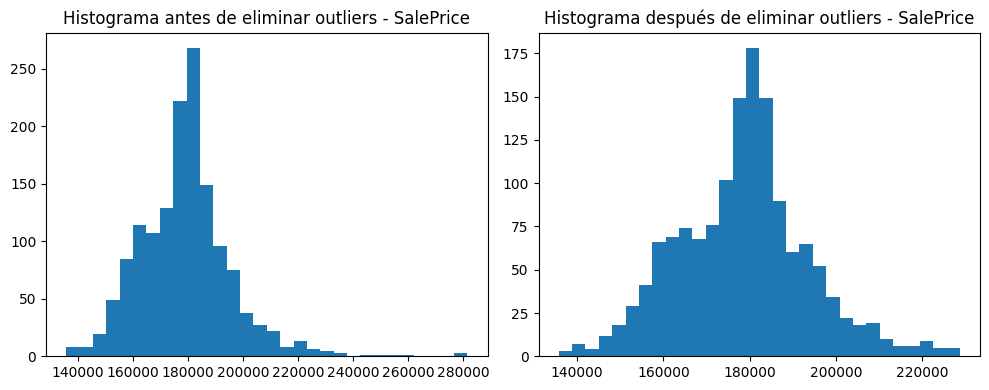

In [38]:
# Visualizacion comparativa de los histograma antes y despues de eliminar los outliers
for column in cols_to_check:
    plt.figure(figsize=(10, 4))

    # Histograma antes de la eliminación de outliers
    plt.subplot(1, 2, 1)
    plt.hist(df[column], bins=30)
    plt.title(f'Histograma antes de eliminar outliers - {column}')

    # Histograma después de la eliminación de outliers
    plt.subplot(1, 2, 2)
    plt.hist(df_no_outliers_z[column], bins=30)
    plt.title(f'Histograma después de eliminar outliers - {column}')

    plt.tight_layout()
    plt.show()

In [39]:

# Se realiza un análisis descriptivo de cada columna en el DataFrame
desc = df_no_outliers_z.describe()

print(desc)


            LotArea     1stFlrSF     2ndFlrSF    GrLivArea  OpenPorchSF  \
count   1446.000000  1446.000000  1446.000000  1446.000000  1446.000000   
mean    9572.188105  1148.752420   324.373444  1476.701245    47.601660   
std     4020.027857   376.625348   418.305994   467.405249    67.081351   
min     1470.000000   407.000000     0.000000   407.000000     0.000000   
25%     7364.750000   872.000000     0.000000  1114.500000     0.000000   
50%     9371.500000  1074.000000     0.000000  1429.000000    28.000000   
75%    11441.750000  1375.000000   672.750000  1716.000000    72.000000   
max    39384.000000  2726.000000  1862.000000  3500.000000   742.000000   

          FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1446.000000  1446.000000   1446.000000   1446.000000   1446.000000   
mean      1.567773     0.375519      2.846473      1.042877      6.366528   
std       0.553603     0.502653      0.821812      0.209368      1.484345   
min       0.0000

In [40]:
df_no_outliers_z.to_csv('/content/drive/MyDrive/df_cleaned.csv')

In [41]:
df1 = pd.read_csv("/content/sample_data/df_cleaned.csv")
df1.head()

,Unnamed: 0,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OpenPorchSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,Street,SalePrice
0,0,11622,896,0,896,0,1,0,2,1,5,1961,1961,730.0,Pave,169277.052498
1,1,14267,1329,0,1329,36,1,1,3,1,6,1958,1958,312.0,Pave,187758.393989
2,2,13830,928,701,1629,34,2,1,3,1,6,1997,1998,482.0,Pave,183583.683570
3,3,9978,926,678,1604,36,2,1,3,1,7,1998,1998,470.0,Pave,179317.477511
4,4,5005,1280,0,1280,82,2,0,2,1,5,1992,1992,506.0,Pave,150730.079977


In [42]:
# Crear variables dummy para las características categóricas
df1 = pd.get_dummies(df1)

# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1.drop(columns=['SalePrice']))

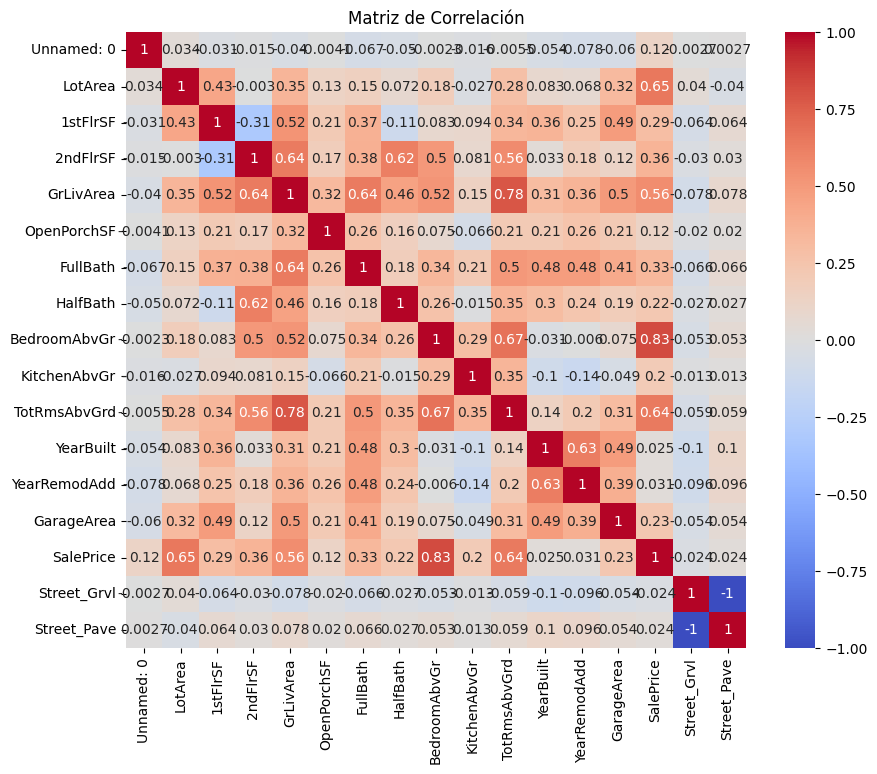

In [43]:
# Calculando la matriz de correlación
correlation_matrix = df1.corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [44]:
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

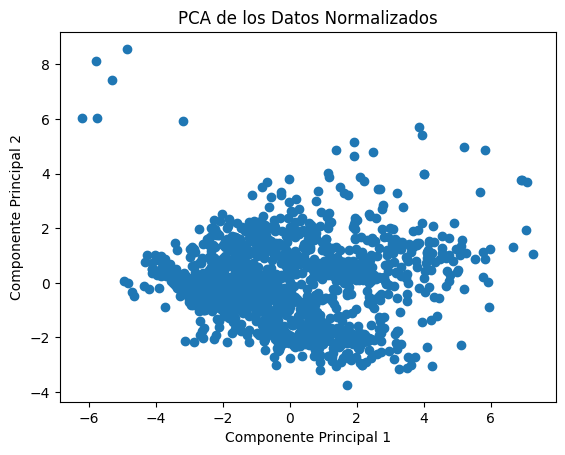

In [45]:
# Visualización de componentes principales
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA de los Datos Normalizados')
plt.show()

In [46]:
# Explicación de la varianza
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por componente principal 1: {explained_variance[0]}')
print(f'Varianza explicada por componente principal 2: {explained_variance[1]}')

Varianza explicada por componente principal 1: 0.28193611066459684
Varianza explicada por componente principal 2: 0.13757185201285477


In [47]:
# Aplicar K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
# Evaluación del modelo de clustering
silhouette_avg = silhouette_score(data_scaled, clusters)
davies_bouldin = davies_bouldin_score(data_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(data_scaled, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')

Silhouette Score: 0.21441333943146193
Davies-Bouldin Score: 1.2858749194204642
Calinski-Harabasz Score: 333.554494591669


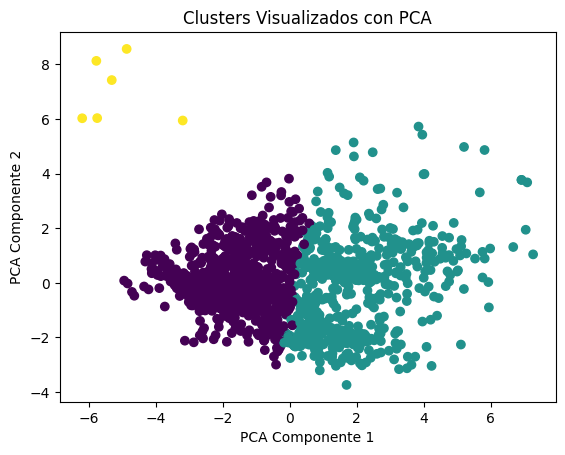

In [49]:
# Visualización de clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters)
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.title('Clusters Visualizados con PCA')
plt.show()

In [50]:
# Añadir la pertenencia al cluster como una característica
df1['cluster'] = clusters

In [51]:
# Selecciona las características (X) y la variable objetivo (y)
X = df1.drop(columns=['SalePrice'])
y = df1['SalePrice']

In [52]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=5)
print(f'Scores de validación cruzada: {scores}')
print(f'Promedio de scores de validación cruzada: {np.mean(scores)}')


# Hacer predicciones con el conjunto de prueba
predictions = model.predict(X_test)


Scores de validación cruzada: [0.95634907 0.96124125 0.957019   0.95159139 0.96144622]
Promedio de scores de validación cruzada: 0.9575293864501685


In [54]:
# Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 8019700.3136949325
R^2: 0.9596192280715976


In [55]:
df1.to_csv

<bound method NDFrame.to_csv of       Unnamed: 0  LotArea  1stFlrSF  2ndFlrSF  GrLivArea  OpenPorchSF  \
0              0    11622       896         0        896            0   
1              1    14267      1329         0       1329           36   
2              2    13830       928       701       1629           34   
3              3     9978       926       678       1604           36   
4              4     5005      1280         0       1280           82   
...          ...      ...       ...       ...        ...          ...   
1441        1454     1936       546       546       1092            0   
1442        1455     1894       546       546       1092           24   
1443        1456    20000      1224         0       1224            0   
1444        1457    10441       970         0        970           32   
1445        1458     9627       996      1004       2000           48   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  YearBuilt  \
0            1         0             2             1             5       1961   
1            1         1             3             1             6       1958   
2            2         1             3             1             6       1997   
3            2         1             3             1             7       1998   
4            2         0             2             1             5       1992   
...        ...       ...           ...           ...           ...        ...   
1441         1         1             3             1             5       1970   
1442         1         1             3             1             6       1970   
1443         1         0             4             1             7       1960   
1444         1         0             3             1             6       1992   
1445         2         1             3             1             9       1993   

      YearRemodAdd  GarageArea      SalePrice  Street_Grvl  Street_Pave  \
0             1961       730.0  169277.052498        False         True   
1             1958       312.0  187758.393989        False         True   
2             1998       482.0  183583.683570        False         True   
3             1998       470.0  179317.477511        False         True   
4             1992       506.0  150730.079977        False         True   
...            ...         ...            ...          ...          ...   
1441          1970         0.0  167081.220949        False         True   
1442          1970       286.0  164788.778231        False         True   
1443          1996       576.0  219222.423400        False         True   
1444          1992         0.0  184924.279659        False         True   
1445          1994       650.0  187741.866657        False         True   

      cluster  
0           0  
1           0  
2           1  
3           1  
4           0  
...       ...  
1441        0  
1442        0  
1443        0  
1444        0  
1445        1  

[1446 rows x 18 columns]>